In [29]:
from knn import KNN, load_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
train_features, train_labels, test_features, test_labels = load_data('./dados/grupoDados1.mat')

knn = KNN(train_features, train_labels)
knn.generate_distance_matrix(test_features)

[[np.float64(0.509901951359278),
  np.float64(0.30000000000000016),
  np.float64(0.24494897427831802),
  np.float64(0.5099019513592783),
  np.float64(0.264575131106459),
  np.float64(0.4123105625617658),
  np.float64(0.31622776601683805),
  np.float64(0.8831760866327848),
  np.float64(0.264575131106459),
  np.float64(0.5000000000000003),
  np.float64(1.5874507866387546),
  np.float64(1.0099504938362076),
  np.float64(1.236931687685298),
  np.float64(0.7549834435270745),
  np.float64(0.6999999999999996),
  np.float64(0.5099019513592785),
  np.float64(0.6403124237432846),
  np.float64(0.469041575982343),
  np.float64(0.6164414002968975),
  np.float64(0.547722557505166),
  np.float64(0.33166247903553997),
  np.float64(0.7810249675906655),
  np.float64(1.284523257866513),
  np.float64(0.31622776601683805),
  np.float64(0.8544003745317529),
  np.float64(0.31622776601683805),
  np.float64(0.4898979485566351),
  np.float64(0.4358898943540671),
  np.float64(0.2999999999999998),
  np.float64(0.

### Q1.1. Qual é a acurácia máxima que você consegue da classificação?

##### R: 98%


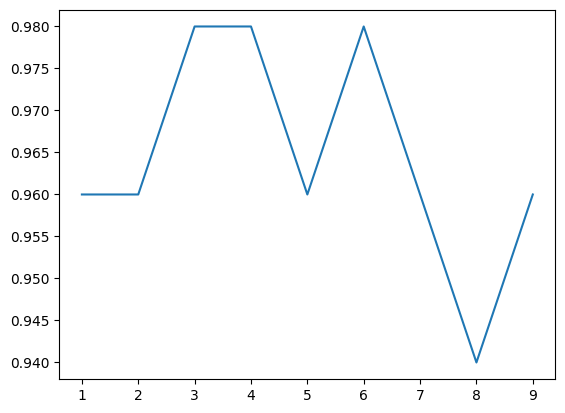

In [5]:
k_to_test = range(1, 10)
k_accuracy = []

for k in k_to_test:
	predicted_labels = knn.get_all_predictions_from_distance_matrix(k)
	accuracy = knn.get_accuracy(predicted_labels, test_labels)
	k_accuracy.append(accuracy)


plt.plot(k_to_test, k_accuracy)
plt.show()

### Q1.2. É necessário ter todas as características (atributos) para obter a acurácia máxima para esta classificação?

In [ ]:
'''
Remover cada coluna e pegar a acuracia média de diferentes valores de K
'''

columns_removed_avg_accuracies = {}

df_values_column_removed = []
df_values_k_tested = []
df_values_acuracy = []


for column in train_features.columns:
	print(f"")
 
	train_features_column_removed = train_features.drop(column, axis=1)
	test_features_column_removed = test_features.drop(column, axis=1)
 
	knn_column_removed = KNN(train_features_column_removed, train_labels)
	knn_column_removed.generate_distance_matrix(test_features_column_removed)
	
	# Calcular a acuracia com diferentes valores de K
	accuracies = []
	
	for k in range(1, 15):
		predictions = knn_column_removed.get_all_predictions_from_distance_matrix(k)
		accuracy = knn_column_removed.get_accuracy(predictions, test_labels)
		accuracies.append(accuracy)
		print(f"coluna removida={column} k={k} acuracia={accuracy}")
		df_values_column_removed.append(column)
		df_values_k_tested.append(k)
		df_values_acuracy.append(accuracy)
  
	columns_removed_avg_accuracies[column] = sum(accuracies) / len(accuracies)
		


coluna removida=0 k=1 acuracia=0.94
coluna removida=0 k=2 acuracia=0.94
coluna removida=0 k=3 acuracia=0.96
coluna removida=0 k=4 acuracia=0.96
coluna removida=0 k=5 acuracia=0.96
coluna removida=0 k=6 acuracia=0.94
coluna removida=0 k=7 acuracia=0.96
coluna removida=0 k=8 acuracia=0.96
coluna removida=0 k=9 acuracia=0.96
coluna removida=0 k=10 acuracia=0.96
coluna removida=0 k=11 acuracia=0.96
coluna removida=0 k=12 acuracia=0.94
coluna removida=0 k=13 acuracia=0.94
coluna removida=0 k=14 acuracia=0.94

coluna removida=1 k=1 acuracia=0.96
coluna removida=1 k=2 acuracia=0.96
coluna removida=1 k=3 acuracia=0.96
coluna removida=1 k=4 acuracia=0.96
coluna removida=1 k=5 acuracia=0.98
coluna removida=1 k=6 acuracia=0.96
coluna removida=1 k=7 acuracia=0.96
coluna removida=1 k=8 acuracia=0.96
coluna removida=1 k=9 acuracia=0.94
coluna removida=1 k=10 acuracia=0.96
coluna removida=1 k=11 acuracia=0.96
coluna removida=1 k=12 acuracia=0.96
coluna removida=1 k=13 acuracia=0.94
coluna removida=1

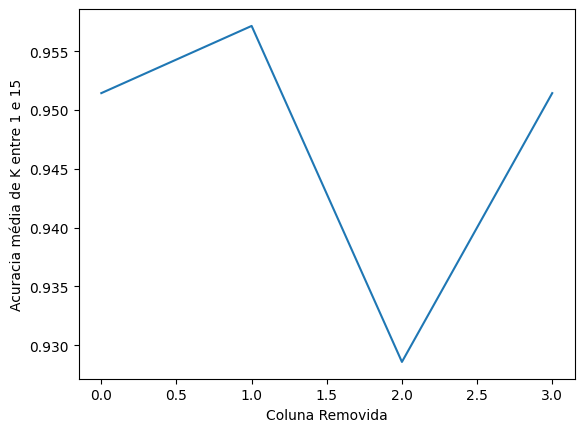

In [ ]:
plt.ylabel('Acuracia média de K entre 1 e 15')
plt.xlabel('Coluna Removida')
plt.plot(columns_removed_avg_accuracies.keys(), columns_removed_avg_accuracies.values())
plt.show()

In [26]:
'''
Acuracia média 
'''

normal_accuracy_avg = sum(k_accuracy) / len(k_accuracy)
print(f"Acuracia média com todas as colunas:\t\t {normal_accuracy_avg}")

for column_removed, avg_accuracy in columns_removed_avg_accuracies.items():
    print(f"Acuracia média removendo a coluna {column_removed} é de\t {avg_accuracy}")

Acuracia média com todas as colunas:		 0.9644444444444444
Acuracia média removendo a coluna 0 é de	 0.9514285714285713
Acuracia média removendo a coluna 1 é de	 0.9571428571428573
Acuracia média removendo a coluna 2 é de	 0.9285714285714286
Acuracia média removendo a coluna 3 é de	 0.9514285714285714
